In [3]:
!pip3 install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 833.7 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 1.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 491.7 kB/s eta 0:00:000:00:01
  Created wheel for peewee: filename=peewee-3.17.8-cp311-cp311-macosx_10_9_x86_64.whl size=270644 sha256=fb980749f54d17e7a0cbf23ad1a8a366e02655ad556154e8cb83ab9a3d9d89b9
  Stored in directory: /Users/hasshya/Library/Caches/pip/wheels/ff/6c/15/506e25bc390de450a7fa53c155cd9b0fbd13ad3e84a9abc183
Successfully built peewee


[*********************100%***********************]  1 of 1 completed


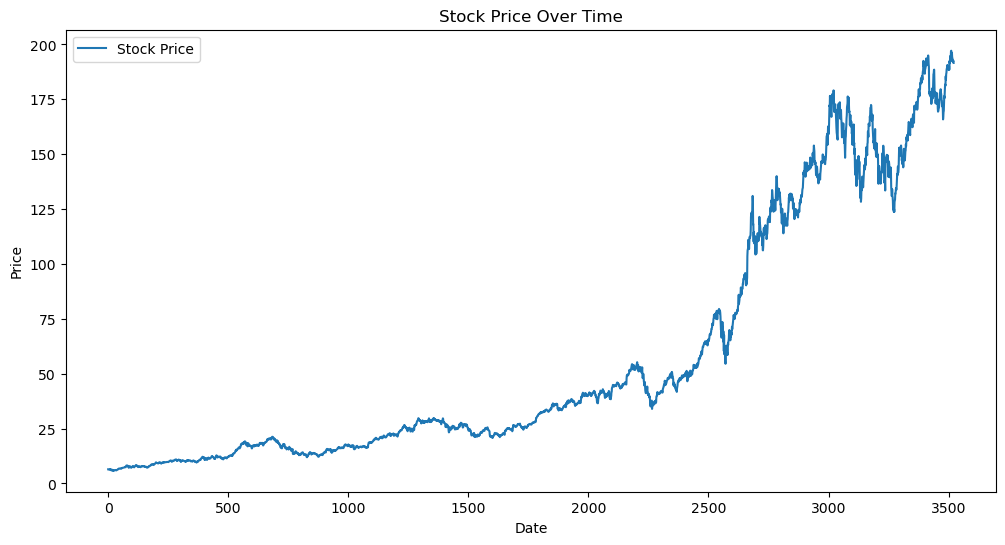

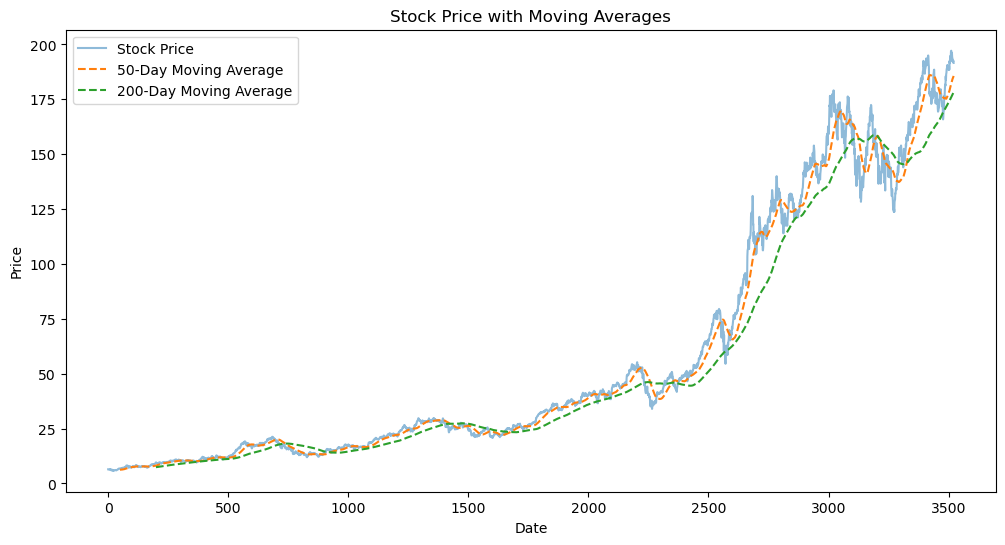

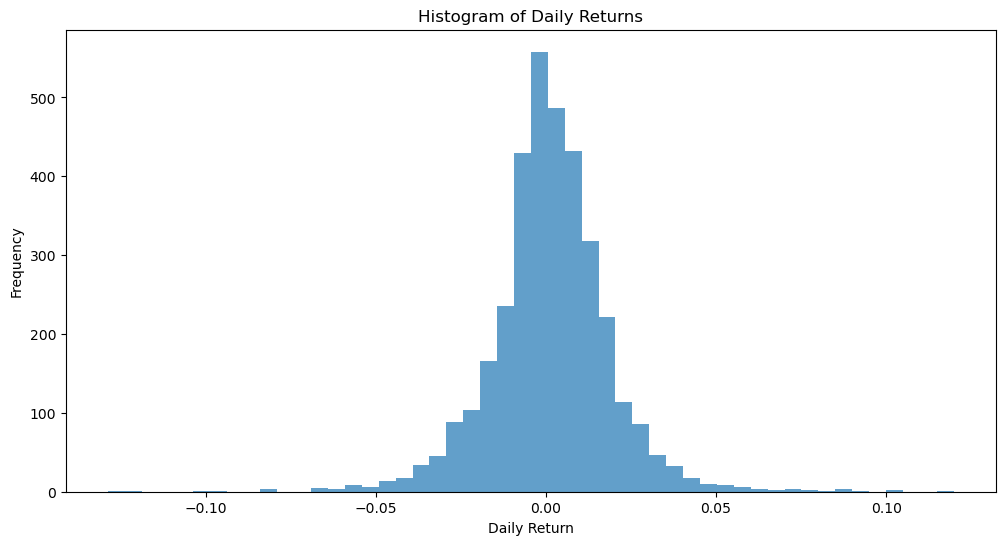

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0056 - val_loss: 0.0030
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 5.4301e-04 - val_loss: 8.4782e-04
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 4.0234e-04 - val_loss: 0.0011
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 3.6454e-04 - val_loss: 0.0049
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 3.9240e-04 - val_loss: 0.0017
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.4417e-04 - val_loss: 8.4037e-04
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.8644e-04 - val_loss: 0.0014
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.3344e-04 - val_loss: 0.0015
Epoch 9/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 3.0016e-04 - val_loss: 0.0017
Epoch 10/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 3.4337e-04 - val_loss: 0.0013
Epoch 11/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.6466e-04 - val_loss: 7.4368e-04
Epoch 12/50
87/87 ━━━━

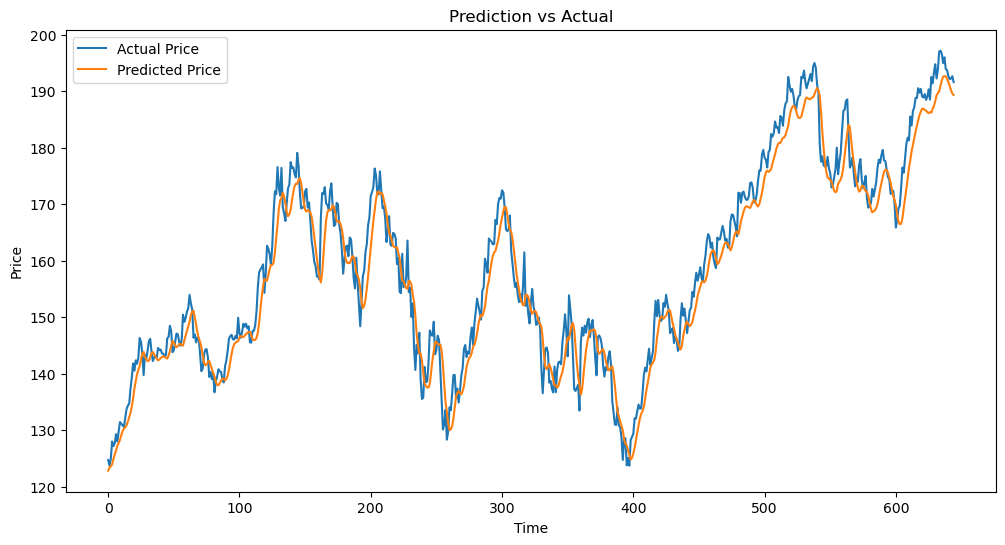

Mean Absolute Error: 3.3598962828170422
Mean Squared Error: 17.102613057278806
Root Mean Squared Error: 4.135530565390468
Mean Absolute Percentage Error: 0.021118446681543095
R-squared Score: 0.9456291155466721


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf

# Load data from Yahoo Finance
def load_data_from_yahoo(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date)
    df = df[['Close']]
    df.reset_index(inplace=True)
    df.rename(columns={'Date': 'Date', 'Close': 'Close'}, inplace=True)
    return df

# Visualize the data
def visualize_data(df, column='Close'):
    plt.figure(figsize=(12, 6))
    plt.plot(df[column], label='Stock Price')
    plt.title('Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Visualize additional insights
def visualize_additional_insights(df):
    # Moving Averages
    df['MA50'] = df['Close'].rolling(window=50).mean()
    df['MA200'] = df['Close'].rolling(window=200).mean()
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Stock Price', alpha=0.5)
    plt.plot(df['MA50'], label='50-Day Moving Average', linestyle='--')
    plt.plot(df['MA200'], label='200-Day Moving Average', linestyle='--')
    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Daily Returns
    df['Daily Return'] = df['Close'].pct_change()
    plt.figure(figsize=(12, 6))
    plt.hist(df['Daily Return'].dropna(), bins=50, alpha=0.7)
    plt.title('Histogram of Daily Returns')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.show()

# Preprocess the data
def preprocess_data(df, feature='Close', train_split=0.8):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[[feature]])

    # Split into training and testing data
    train_size = int(len(scaled_data) * train_split)
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size:]

    return train_data, test_data, scaler

# Prepare the data for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Build the LSTM model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False),
        Dropout(0.2),
        Dense(units=25),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Visualize predictions
def visualize_predictions(original, predicted, title='Prediction vs Actual'):
    plt.figure(figsize=(12, 6))
    plt.plot(original, label='Actual Price')
    plt.plot(predicted, label='Predicted Price')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Main function
if __name__ == '__main__':
    # Fetch data
    ticker = 'AAPL'  # Replace with any stock ticker, e.g., 'GOOG', 'MSFT', etc.
    start_date = '2010-01-01'
    end_date = '2023-12-31'
    df = load_data_from_yahoo(ticker, start_date, end_date)

    # Visualize stock price
    visualize_data(df)

    # Visualize additional insights
    visualize_additional_insights(df)

    # Preprocess data
    train_data, test_data, scaler = preprocess_data(df)

    # Prepare data for training and testing
    time_step = 60
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)

    # Reshape data to 3D for LSTM
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Build and train the LSTM model
    model = build_lstm_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

    # Predict on test data
    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred)
    y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Visualize predictions
    visualize_predictions(y_test_scaled, y_pred)

    # Evaluate the model
    print("Mean Absolute Error:", mean_absolute_error(y_test_scaled, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test_scaled, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test_scaled, y_pred)))
    print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test_scaled, y_pred))
    print("R-squared Score:", r2_score(y_test_scaled, y_pred))
